# Sampling Distributions Dance Party!

Get your dancing shoes ready! You are a DJ trying to make sure you are ready for a big party. You don’t have time to go through all the songs you can work with. Instead, you want to make sure that any sample of 30 songs from your playlist will get the party started. To do this, you will use the power of sampling distributions!

The dataset we are using for this project can be found here. For simplicity, we have removed some unnecessary columns.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [3]:
def choose_statistic(x, sample_stat_text):
  # calculate mean if the text is "Mean"
  if sample_stat_text == "Mean":
    return np.mean(x)
  # calculate minimum if the text is "Minimum"
  elif sample_stat_text == "Minimum":
    return np.min(x)
  # calculate variance if the text is "Variance"
  elif sample_stat_text == "Variance":
    return np.var(x, ddof=1)
  # if you want to add an extra stat
  elif sample_stat_text=="Median":
    return np.median(x)
  # raise error if sample_stat_text is not "Mean", "Minimum", or "Variance"
  else:
    raise Exception('Make sure to input "Mean", "Minimum", or "Variance"')

def population_distribution(population_data):
  # plot the population distribution
  sns.histplot(population_data, stat='density')
  # informative title for the distribution 
  plt.title(f"Population Distribution")
  # label the mean of the distribution
  plt.axvline(np.mean(population_data),color='orange',linestyle='dashed', label='Mean of the Population')
  # remove None label
  plt.xlabel('')
  plt.show()
  plt.clf()

def sampling_distribution(population_data, samp_size, stat):
  # list that will hold all the sample statistics
  sample_stats = []
  for i in range(500):
    # get a random sample from the population of size samp_size
    samp = np.random.choice(population_data, samp_size, replace = False)
    # calculate the chosen statistic (mean, minimum, or variance) of the sample
    sample_stat = choose_statistic(samp, stat)
    # add sample_stat to the sample_stats list
    sample_stats.append(sample_stat)
  
  pop_statistic = round(choose_statistic(population_data, stat),2)
  # plot the sampling distribution
  sns.histplot(sample_stats, stat='density')
  # informative title for the sampling distribution
  plt.title(f"Sampling Distribution of the {stat} \nMean of the Sample {stat}s: {round(np.mean(sample_stats), 2)} \n Population {stat}: {pop_statistic}")
  plt.axvline(pop_statistic,color='g',linestyle='dashed', label=f'Population {stat}')
  # plot the mean of the chosen sample statistic for the sampling distribution
  plt.axvline(np.mean(sample_stats),color='orange',linestyle='dashed', label=f'Mean of the Sample {stat}s')
  plt.legend()
  plt.show()
  plt.clf()

In [4]:
# task 1: load in the spotify dataset
spotify_data = pd.read_csv("data/spotify_data.csv")

# task 2: preview the dataset
display(spotify_data.head(10))

# task 3: select the relevant column
song_tempos = spotify_data["tempo"]

,tempo,danceability,energy,instrumentalness,liveness,valence
0,156.985,0.831,0.814,0.013400,0.0556,0.3890
1,115.080,0.719,0.493,0.000000,0.1180,0.1240
2,218.050,0.850,0.893,0.000004,0.3720,0.0391
3,186.948,0.476,0.781,0.000000,0.1140,0.1750
4,147.988,0.798,0.624,0.000000,0.1660,0.5910
5,144.915,0.721,0.568,0.212000,0.1280,0.1090
6,130.826,0.718,0.668,0.007800,0.1240,0.0380
7,138.049,0.694,0.711,0.000000,0.1120,0.2830
8,219.960,0.774,0.751,0.000000,0.0728,0.1890
9,199.942,0.893,0.907,0.031100,0.5580,0.3020


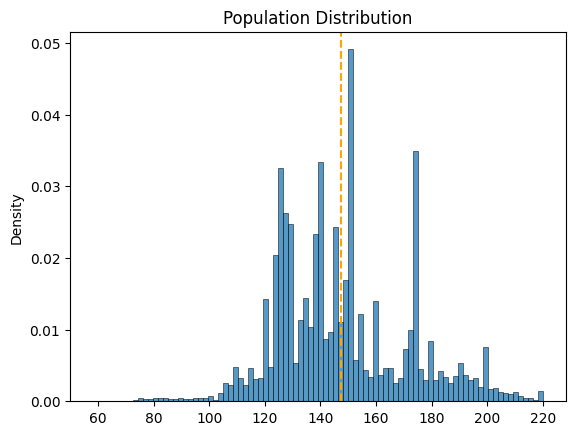

<Figure size 640x480 with 0 Axes>

In [5]:
population_distribution(song_tempos)

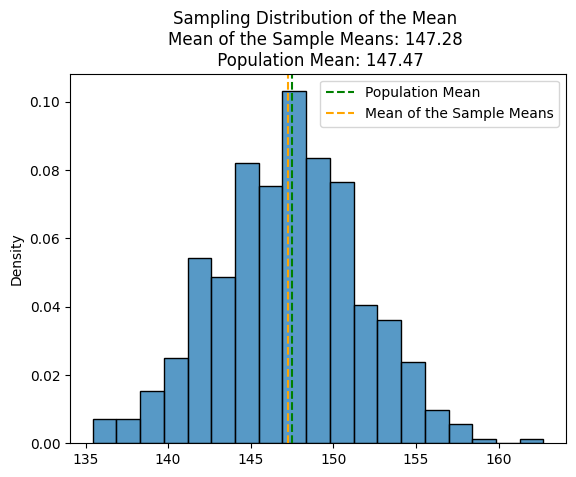

<Figure size 640x480 with 0 Axes>

In [6]:
sampling_distribution(song_tempos, 30, "Mean")

Wow! Sampling distribution mean and the population mean are exactly the same!

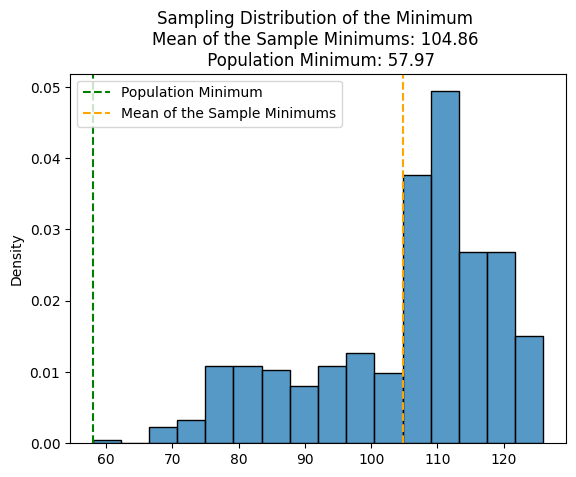

<Figure size 640x480 with 0 Axes>

In [7]:
# task 8: sampling distribution of the sample minimum
sampling_distribution(song_tempos, 30, "Minimum")

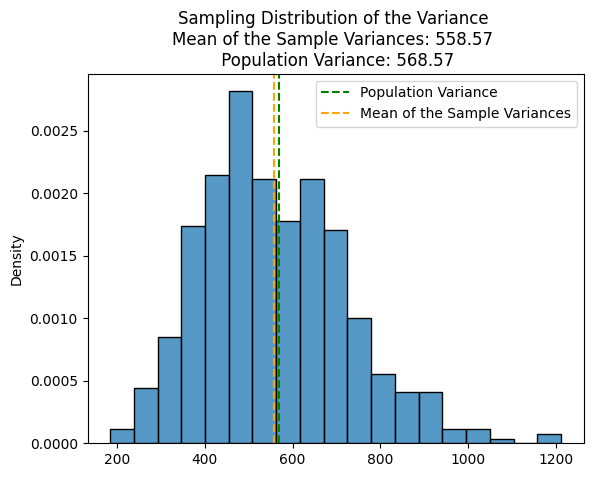

<Figure size 640x480 with 0 Axes>

In [8]:
# task 10: sampling distribution of the sample variance
sampling_distribution(song_tempos, 30, "Variance")

In [9]:
# task 13: calculate the population mean and standard deviation
tempo_pop_mean = np.mean(song_tempos)
tempo_std_dev = np.std(song_tempos)
print(tempo_pop_mean)
print(tempo_std_dev)

147.4740559035575
23.84434149567985


In [10]:
# task 14: calculate the standard error
n = 30
standard_error = tempo_std_dev / (n ** 0.5)
print("Standard error of sample: ", standard_error)

Standard error of sample:  4.3533612353467745


In [11]:
# task 15: calculate the probability of observing an average tempo of 140bpm or lower from a sample of 30 songs
print("probability of observing an average tempo of 140bpm or lower: ", stats.norm.cdf(140, tempo_pop_mean, standard_error))

probability of observing an average tempo of 140bpm or lower:  0.043003550159587636


In [12]:
# task 16: calculate the probability of observing an average tempo of 150bpm or higher from a sample of 30 songs
p_more_than_150 = 1 - stats.norm.cdf(140, tempo_pop_mean, standard_error)
print("probability of observing an average tempo of 150bpm or higher: ", p_more_than_150)

probability of observing an average tempo of 150bpm or higher:  0.9569964498404123


Awesome job! You are ready to throw an awesome party! If you want to do some more exploration of sampling distributions, here are some more opportunities:

 - Add another sample statistic to the `choose_statistic()` function — such as median, mode, or maximum.
 - Explore a different column of data from the `spotify_data.csv` dataset.
 - Use the sampling distribution of the sample minimum to estimate the probability of observing a specific sample minimum. For example, from the plot, what is the chance of getting a sample minimum that is less than 130bpm?

In [13]:
danceability = spotify_data["danceability"]
danceability_pop_mean = np.mean(danceability)
danceability_std_dev = np.std(danceability)
print(danceability_pop_mean)
print(danceability_std_dev)

0.6393643210022456
0.1566152732579436


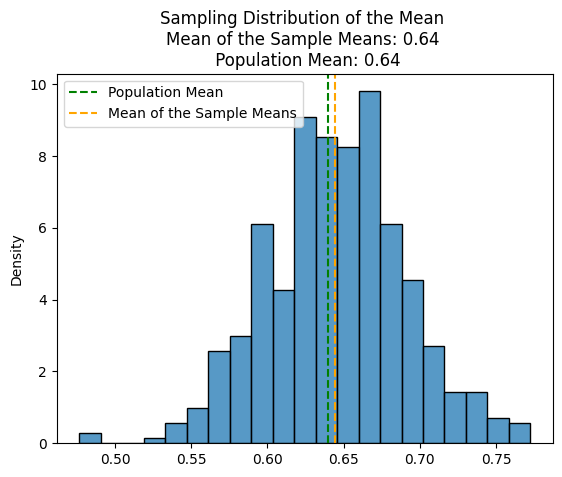

<Figure size 640x480 with 0 Axes>

In [20]:
sampling_distribution(danceability, 10, "Mean")

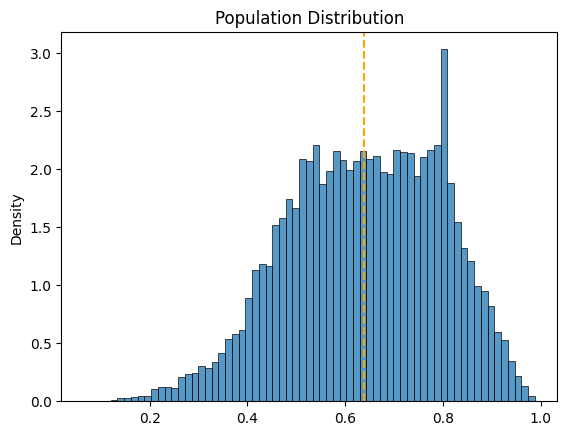

<Figure size 640x480 with 0 Axes>

In [14]:
# plot the population distribution of danceability
population_distribution(danceability)

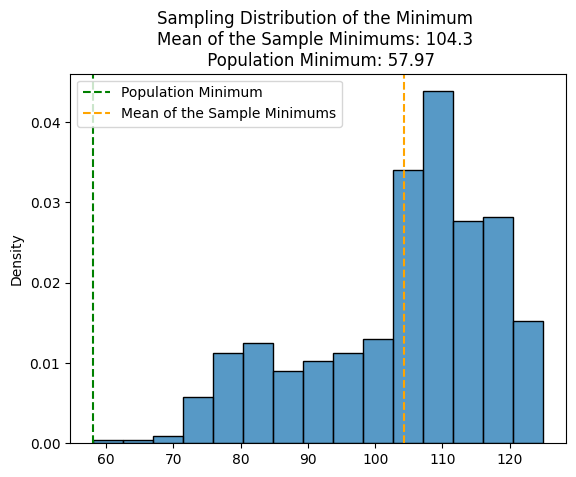

probability of observing a sample minimum of 130bpm or lower:  1.0


<Figure size 640x480 with 0 Axes>

In [17]:
sampling_distribution(song_tempos, 30, "Minimum")
tempo_pop_min = np.min(song_tempos)

# chance of getting a sample minimum that is less than 130bpm
p_less_than_130 = stats.norm.cdf(130, tempo_pop_min, standard_error)
print("probability of observing a sample minimum of 130bpm or lower: ", p_less_than_130)